# MuTe 2D
Codigo para identificar los pixeles iluminados en los paneles a partir de la dirección de arribo de muones identificadas mediante los cosenos directores:

$\vec{\mathrm{e}}_{r}  =\frac{\vec{r}}{|\vec{r}|} =   \cos(a) \vec{\mathrm{e}}_{\bar{x}} +\cos(a) \vec{\mathrm{e}}_{\bar{y}}  +\cos(c) \vec{\mathrm{e}}_{\bar{z}}$

respecto a los ejes coodenados $(\bar{x},\bar{y},\bar{z})$ fijos en el telescopio


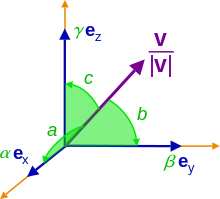

In [11]:
from IPython.display import Image
Image(filename='Figuras/Direction_cosine_unit_vector.png')

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

/Users/luisnunez/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Algunas funciones para empezar

In [5]:
# Función que pinta los paneles y los pixeles
# PanelArriba y PanelAbajo son dos arreglos bidimensionales NBar x NBar
def PintoPaneles(PanelArriba,PanelAbajo) :
    plt.subplot(1, 2, 1)
    plt.xlabel('i')
    plt.ylabel('j')
    plt.title('Panel superior')
    plt.imshow(PanelArriba)
    plt.subplot(1, 2, 2)
    plt.xlabel('k')
    plt.ylabel('l')    
    plt.title('Panel inferior')
    plt.imshow(PanelAbajo)
    # dibujo los paneles
    plt.show()
    return

In [6]:
# Valido si la función de entrada coseno o seno está en los rangos
def ValidoCosenoSeno(CosSen) :
    if CosSen < -1 or CosSen > 1 :
         print " error en la funcion coseno o seno  " 
    return 

## Paneles

Caracterizo los dos paneles paralelos, separados una distancia $D \equiv \texttt{SeparacionPaneles}$ (medida en cm) conformados con $N \equiv \texttt{NBar}$ = número de Barras, cada una con un ancho $d \equiv \texttt{AnchBar}$ (medida en centímetros)

In [7]:
# NBar = input("Numero de Barras ? ")
# AnchBar = input("Ancho de las Barras (cn) ? ")
# SeparacionPaneles = input("Separacion de los Paneles (cm) ? ")
NBar = 11 
AnchBar = 5 # cm
SeparacionPaneles = 100 # cm

Pinto los paneles

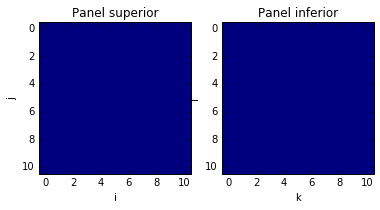

In [8]:
# limpio el contenido de los paneles
PanelSuperior = np.zeros((NBar,NBar)) # i j
PanelInferior = np.zeros((NBar,NBar)) # k l
PintoPaneles(PanelSuperior,PanelInferior)

a partir de las definiciones de los cosenos directores de la dirección de incidencia en términos de las dimensiones del detector 

$\vec{r}_{m n} = X_{m}\vec{\mathrm{e}}_{\bar{x}} +Y_{n}\vec{\mathrm{e}}_{\bar{y}} +Z \vec{\mathrm{e}}_{\bar{z}} \equiv
d(k-i)\vec{\mathrm{e}}_{\bar{x}} + d(l-j)\vec{\mathrm{e}}_{\bar{y}} +D\vec{\mathrm{e}}_{\bar{z}}$

donde $i, j$ indican las posiciones de las barras en el panel superior tal y como se indica en la figura, mientras que $ k , l $ corresponden a las posiciones de las barras en el panel inferior.

Por otro lado tenemos que 

$\vec{\mathrm{e}}_{r}  =\frac{\vec{r}}{|\vec{r}|} =   
\cos(a) \vec{\mathrm{e}}_{\bar{x}} +\cos(b) \vec{\mathrm{e}}_{\bar{y}}  +\cos(c) \vec{\mathrm{e}}_{\bar{z}}   \equiv 
\frac{(k-i)}{\sqrt{ (k -i)^{2} + (l -j)^{2} + \left(\frac{D}{d}\right)^{2} }  } \vec{\mathrm{e}}_{\bar{x}} +
\frac{(l-j)}{\sqrt{ (k -i)^{2} + (l -j)^{2} + \left(\frac{D}{d}\right)^{2} }  } \vec{\mathrm{e}}_{\bar{y}} +
\frac{ \left(\frac{D}{d}\right)}{\sqrt{ (k -i)^{2} + (l -j)^{2} + \left(\frac{D}{d}\right)^{2} }} \vec{\mathrm{e}}_{\bar{z}} $

Con lo cual los cosenos directores quedan definidos en términos de los parámetros del telescopio como

$\cos(a) = \frac{(k-i)}{\sqrt{ (k -i)^{2} + (l -j)^{2} + \left(\frac{D}{d}\right)^{2} }  }; \quad $
$\cos(b) = \frac{(l-j)}{\sqrt{ (k -i)^{2} + (l -j)^{2} + \left(\frac{D}{d}\right)^{2} }  }; \quad $
$\cos(c) = \frac{ \left(\frac{D}{d}\right)}{\sqrt{ (k -i)^{2} + (l -j)^{2} + \left(\frac{D}{d}\right)^{2} }}. \quad$ con la restricción $\cos(a)^{2} + \cos(b)^{2} + \cos(c)^{2} = 1 $

Resolviendo ese sistema encontramos

$(k -i) = \pm \frac{D \cos(a) }{d \sqrt{ 1 - \cos(a)^{2} - \cos(b)^{2}} }; \quad $ y 
$\quad (l -j) = \pm \frac{D \cos(b) }{d \sqrt{ 1 - \cos(a)^{2} - \cos(b)^{2}}}.$ 

Por lo tanto al conocer la dirección de arribo en términos de los cosenos directores, tendremos las relaciónes que deben cumplir los índices de los pixeles

## Los consenos directores de las direcciones de incidencia
Se insertan las direcciones de arribo en función de los cosenos directores

In [9]:
# CosAlpha = input("cos(alpha) ? ")
# CosBeta = input("cos(beta) ? ")
CosAlpha = 0.2 
ValidoCosenoSeno(CosAlpha)
CosBeta = .3
ValidoCosenoSeno(CosBeta)

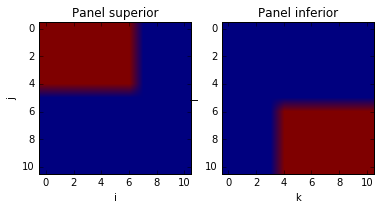

In [10]:
# limpio el contenido de los paneles
PanelSuperior = np.zeros((NBar,NBar)) # i j
PanelInferior = np.zeros((NBar,NBar)) # k l
# ilumino los puntos que corresponden a direcciones equivalentes
DeltaXIngreso = int(SeparacionPaneles*CosAlpha/(AnchBar*math.sqrt(1-CosAlpha**2 -CosBeta**2)))
DeltaYIngreso = int(SeparacionPaneles*CosBeta/(AnchBar*math.sqrt(1-CosAlpha**2 -CosBeta**2)))
#
for i in range(NBar)  :
    for j in range(NBar)  :
        if i+DeltaXIngreso < NBar  and i+DeltaXIngreso >= 0 :
            if j+DeltaYIngreso < NBar  and j +DeltaYIngreso >= 0 :
                PanelSuperior[j,i]= 10.
                PanelInferior[j+DeltaYIngreso,i+DeltaXIngreso]= 10.
            else :continue
        else : continue
# Pinto los paneles            
PintoPaneles(PanelSuperior,PanelInferior)